Path de los datos

In [2]:
cd drive/My\ Drive

/content/drive/My Drive


In [3]:
cd 9sem/aprendizaje\ maquina/lab1_linear_regresion

/content/drive/My Drive/9sem/aprendizaje maquina/lab1_linear_regresion


In [4]:
cd Data\ 1

/content/drive/My Drive/9sem/aprendizaje maquina/lab1_linear_regresion/Data 1


lectura de los datos

In [10]:
# lectura de datos
import numpy as np
weights = [float(i.strip()) for i in open("./weight.dat").readlines()] #el strip elimina el \n 
heights = [float(i.strip()) for i in open("./height.dat").readlines()] #el strip elimina el \n 
#conversion a numpy arrray
weights = np.array(weights) 
heights = np.array(heights)
#normalizacion
maxHeights = heights.max()
maxWeights = weights.max()
weights_n = weights/weights.max()
heights_n = heights/heights.max()



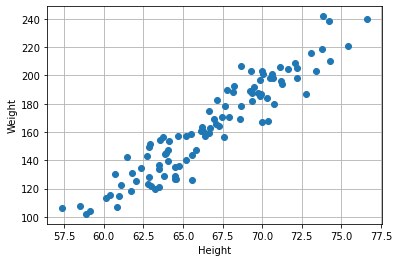

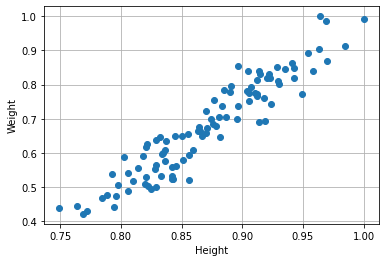

In [8]:
# muestra los datos en una grafica
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 101)
#grafica de datos 
fig, ax = plt.subplots()
ax.grid()
ax.set(xlabel='Height', ylabel='Weight')
ax.plot(heights, weights, 'o')
#ax.plot(x,b0+b1*x)
fig.savefig("Height-Weight.png")
plt.show()
#grafica de datos normalizados
fig, ax = plt.subplots()
ax.grid()
ax.set(xlabel='Height', ylabel='Weight')
ax.plot(heights_n, weights_n, 'o')
#ax.plot(x,b0+b1*x)
fig.savefig("Height_n-Weight_n.png")
plt.show()

#Descenso de Gradiente 


step: 1910
learningRate 0.001
loss:  0.00783031216742224
gradient b0: -0.020445838862157863   gradient b1: -0.024033936291377022
b0: 0.36725118369438453   b1: 0.3323162422970489



step: 262
learningRate 0.01
loss:  0.0075592754273525
gradient b0: -0.003422600167813563   gradient b1: -0.009172091168734943
b0: 0.3747615657595183   b1: 0.3433199346449108



step: 1420
learningRate 0.5
loss:  0.0016900812528641098
gradient b0: 0.0009289979276489374   gradient b1: -0.0010646352044697284
b0: -0.8881943596815991   b1: 1.7979807487636636



step: 916
learningRate 1
loss:  0.0013931552405074688
gradient b0: 0.0006558297198415747   gradient b1: -0.0007515833858185326
b0: -1.0503650147758679   b1: 1.9838289443373966




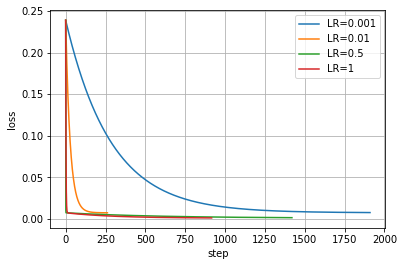

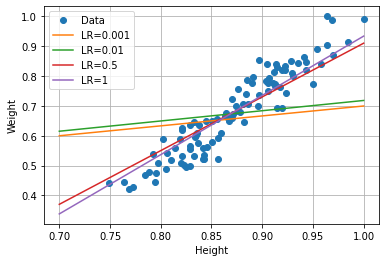

In [19]:
# Definición de los ajustes y parámetros iniciales
num_steps = 50000
#entrenamiento con datos normalizados
trainX=heights_n  
trainY=weights_n
learningRates=[ 0.001,  0.01,  0.5,  1]
#learningRates=[2,  2.5]
N=len(trainX)
#inicio de la graficas
fig_loss, ax_loss = plt.subplots()
ax_loss.grid()
ax_loss.set(xlabel='step', ylabel='loss')

fig, ax = plt.subplots()
ax.grid()
ax.set(xlabel='Height', ylabel='Weight')
ax.plot(heights_n, weights_n, 'o',label="Data")
#Proceso iterativo
for learningRate in learningRates:
  b0 = 0
  b1 = 0
  last_loss=0
  losses=[]
  for step in range(0, num_steps):
    b0_gradient = 0
    b1_gradient = 0
    loss=0
    #actualizar parametros al termino de un periodo
    for i in range(0, N):
      # calculo de los gradientes
      b0_gradient+=((b0 + b1 * trainX[i])-trainY[i]) #la derivade de lo de adentro es 0
      b1_gradient+=((b0 + b1 * trainX[i])-trainY[i]) * trainX[i]
      #calculo del error
      loss+=((b0 + b1 * trainX[i])-trainY[i])**2
    # actualizacion de pesos
    b0 =b0 -(learningRate * b0_gradient/(N))
    b1 =b1 -(learningRate * b1_gradient/(N))
    losses.append(loss/(2*N))
    #perdida promedio
    avg_loss=(loss/(2*N))
    #convergencia
    if abs(last_loss-avg_loss)<0.000001 or avg_loss>1000:
      #imprime los parametros
     # print(last_loss,avg_loss)
      print("\nstep:",step)
      print("learningRate",learningRate)
      print("loss: ",loss/(2*N))
      print("gradient b0:",b0_gradient/N,"  gradient b1:",b1_gradient/N)
      print("b0:",b0,"  b1:",b1) 
      print("\n")
      #grafica de perdida
      x = np.linspace(0, len(losses)-1, len(losses))
      ax_loss.plot(x, losses,label="LR="+str(learningRate))
      # grafica de datos y modelo
      x = np.linspace(.7, 1, 101)#espacio de grafica del modelo
      ax.plot(x,b0+b1*x,label="LR="+str(learningRate))
      break
    #asigna la perdida anterior  
    last_loss=avg_loss
#agrega leyenda y guarda las graficas
ax.legend()
fig.savefig("LR_model_2.png")
ax_loss.legend()
#ax_loss.set(ylim=(0, .05))
fig_loss.savefig("LR_model_loss_2.png")
plt.show()

#Predicción

195.2950545233966


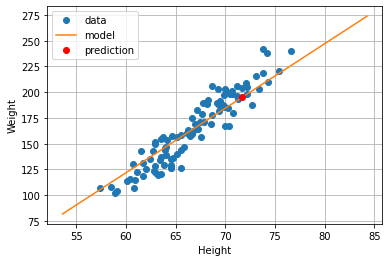

In [26]:
Height_predict=71.731
#usando los pesos
print((b0+b1*(Height_predict/maxHeights))*maxWeights)
x = np.linspace(.7*maxHeights, 1.1*maxHeights, 101)
#grafica de datos 
fig, ax = plt.subplots()
ax.grid()
ax.set(xlabel='Height', ylabel='Weight')
ax.plot(heights, weights, 'o',label="data")
ax.plot(x,(b0+b1*(x/maxHeights))*maxWeights, label="model")
ax.plot(Height_predict,(b0+b1*(Height_predict/maxHeights))*maxWeights,'ro',label="prediction")
ax.legend()
plt.show()

#Descenso de gradiente estocastico

In [ ]:
# Definición de los ajustes y parámetros iniciales
num_steps =50000 #50000
learningRate = 0.01 #valor ideal 0.0004
trainX=heights_n
trainY=weights_n
b0 = 0
b1 = 0
losses=[]
N=len(trainX)
# Proceso iterativo
#actualizar parametros por cada ejemplo
for step in range(0, num_steps):
  print("\n",step,":")
  loss=0
  for i in range(0, len(trainX)):
    b0_gradient = 0
    b1_gradient = 0
    #Calculo del error
    loss+=(trainY[i]-(b0 + b1 * trainX[i]))**2
    
    # calculo de los gradientes
    b0_gradient=((b0 + b1 * trainX[i])-trainY[i]) #la derivade de lo de adentro es 0
    b1_gradient=((b0 + b1 * trainX[i])-trainY[i]) * trainX[i]

    # print("loss: ",loss)
    #actualizacion de pesos
    b0 =b0 -(learningRate * b0_gradient)
    b1 =b1 -(learningRate * b1_gradient)
    # print("gradiente :",b0_gradient,b1_gradient)
    # print("pesos :",b0,b1)
  losses.append(loss/(2*N))
  print("\nstep:",step)
  print("loss: ",loss/(2*N))
  print("gradiente :",b0_gradient/N,b1_gradient/N)
  print("pesos :",b0,b1) 

In [ ]:
N = len(losses)
x = np.linspace(0, len(losses)-1, N)

fig, ax = plt.subplots(figsize=(20, 10))
ax.grid()
ax.set(ylim=(0, 1000))
ax.set(xlabel='step', ylabel='loss')
ax.plot(x, losses)
#ax.plot(x,b0+b1*x)

plt.show()